In [3]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import table
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from functions.timeseries_functions import index_to_datetime, plot_all_df_columns, plot_series,\
plot_series_save_fig, plot_series_and_differences, run_augmented_Dickey_Fuller_test, \
plot_autocorrelation, plot_partial_autocorrelation, plot_decomposition

In [5]:
from fbprophet import Prophet

In [6]:
from functions.prophet_functions import get_prophet_training_mse, get_prophet_test_mse,\
get_prophet_forecast, plot_prophet_forecast, get_prophet_forecast_w_holidays,\
prophet_forecast_to_csv, get_prophet_forecast_date_index, get_prophet_forecast_holidays_date_index

#### add holiday component

In [7]:
christmas_dates = ['2015-12-25', '2016-12-25', '2017-12-25']
new_year_dates = ['2016-01-01', '2017-01-01', '2018-01-01']
thanksgiving_dates = ['2015-11-26', '2016-11-24', '2017-11-23']

In [8]:
christmas = pd.DataFrame({'holiday':'Christams', 'ds': pd.to_datetime(christmas_dates)})

In [9]:
thanksgiving = pd.DataFrame({'holiday':'Thanksgiving', 'ds': pd.to_datetime(thanksgiving_dates)})

In [10]:
new_years = pd.DataFrame({'holiday':'New Years', 'ds': pd.to_datetime(new_year_dates)})

In [11]:
holidays = pd.concat([christmas, thanksgiving, new_years])

In [12]:
holidays1 = holidays.copy()
holidays2 = holidays.copy()
holidays1_2 = holidays.copy()
holidays2_1 = holidays.copy()

In [13]:
holidays1['lower_window'] = -1
holidays1['upper_window'] = 1

In [14]:
holidays2['lower_window'] = -2
holidays2['upper_window'] = 2

In [15]:
holidays1_2['lower_window'] = -1
holidays1_2['upper_window'] = 2

In [16]:
holidays2_1['lower_window'] = -2
holidays2_1['upper_window'] = 1

In [17]:
holiday_windows = [holidays1, holidays2, holidays1_2, holidays2_1]

### using weekly data

In [18]:
dr_df = pd.read_csv('./data/doctors_hours_per_provider.csv')
RNPA_df = pd.read_csv('./data/RNPA_hours_per_provider.csv')
ther_df = pd.read_csv('./data/therapists_hours_per_provider.csv')

In [19]:
dr_df.columns

Index(['AppointmentDate', 'Number_Providers', 'Hours', 'Hours_per_Provider'], dtype='object')

#### test MSE for different holiday intervals to determine best interval for each category

In [20]:
weekly_data = [dr_df, RNPA_df, ther_df]
df_names = ['Doctors', 'RN/PAs', 'therapists']

In [21]:
df_cols = ['date', 'Number_Providers', 'Hours', 'Hours_per_Provider']
date_hours_cols = ['date', 'Hours']
periods = 90
pred_cols = ['yhat', 'yhat_lower', 'yhat_upper']

In [22]:
# get MSE for forecasts with holidays w/ different windows included
holiday_windows = [holidays1, holidays2, holidays1_2, holidays2_1]
for i in range(len(weekly_data)):
    for h in holiday_windows:
        model, forecast, predictions_df = get_prophet_forecast_w_holidays(df=weekly_data[i], df_name=df_names[i], df_cols=df_cols,\
                     date_hours_cols=date_hours_cols, pred_cols=pred_cols, periods=periods, holidays=h)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for Doctors training set is 198.3662993718893
MSE for Doctors test set is 113.75067235739625


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for Doctors training set is 198.3662901848026
MSE for Doctors test set is 113.75063140468086


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for Doctors training set is 198.3675608994746
MSE for Doctors test set is 113.75593367520447


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for Doctors training set is 198.3675608994746
MSE for Doctors test set is 113.75593367520447


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for RN/PAs training set is 544.4169492393999
MSE for RN/PAs test set is 860.5350631054708


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for RN/PAs training set is 544.7946790265269
MSE for RN/PAs test set is 853.85184847322


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for RN/PAs training set is 550.3711575096808
MSE for RN/PAs test set is 862.5990664108434


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for RN/PAs training set is 550.3711575096808
MSE for RN/PAs test set is 862.5990664108434


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for therapists training set is 72.45424032416537
MSE for therapists test set is 108.98130031615318


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for therapists training set is 72.44731253207732
MSE for therapists test set is 109.11513288762978


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE for therapists training set is 72.45354086404966
MSE for therapists test set is 108.99953550224075
MSE for therapists training set is 72.45354086404966
MSE for therapists test set is 108.99953550224075


#### plot models for all categories

In [26]:
weekly_data = [dr_df, RNPA_df, ther_df]
df_names = ['Doctors', 'RN/PAs', 'therapists']

In [27]:
date_col = 'date'
hours_col = 'Hours'
periods = 90
pred_cols = ['yhat', 'yhat_lower', 'yhat_upper']

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


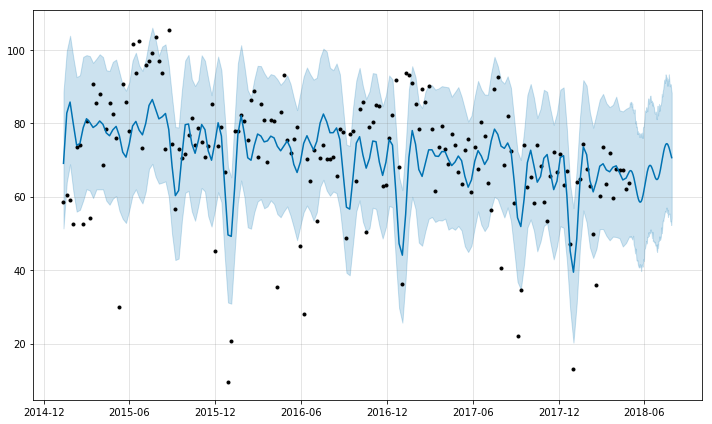

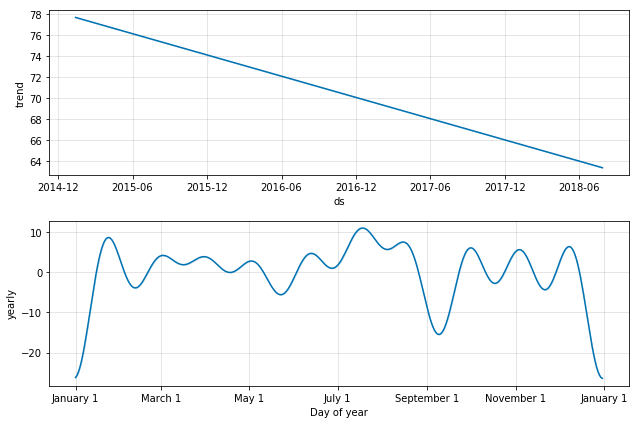

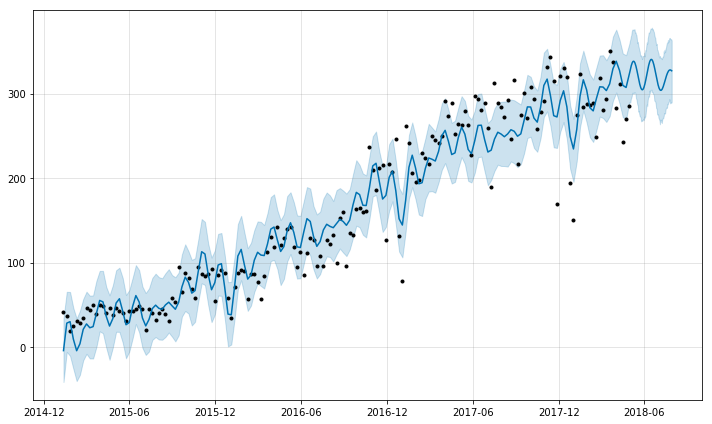

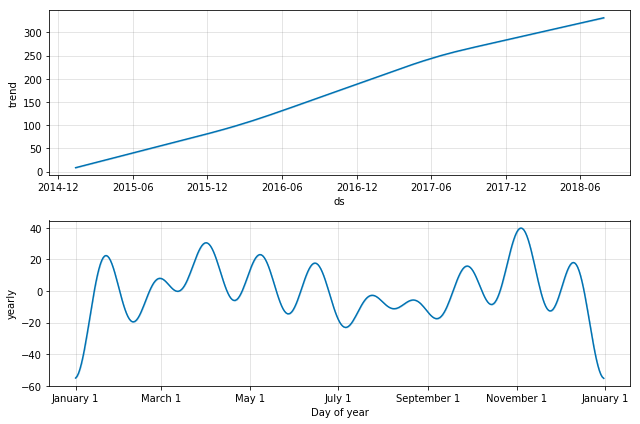

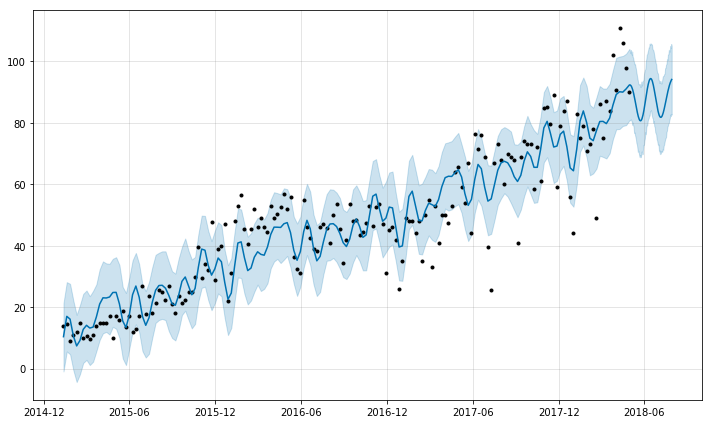

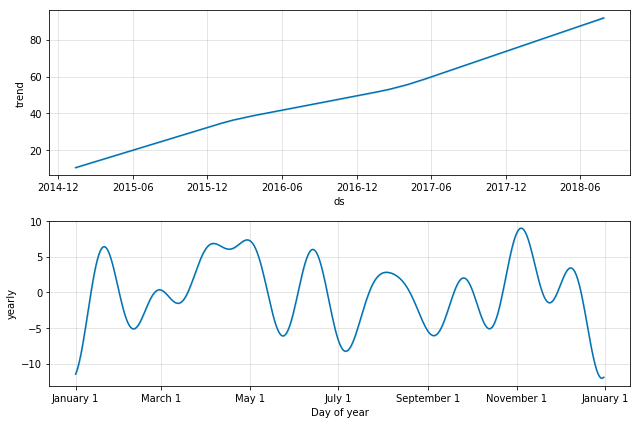

In [28]:
# Get forecast and plot for all 3 categories w/out holidays
for i in range(len(weekly_data)):
    model, forecast, pred, predictions_df = get_prophet_forecast_date_index(df=weekly_data[i], date_col=date_col,\
                     hours_col=hours_col, pred_cols=pred_cols, periods=periods)
    plot_prophet_forecast(model, forecast)

#### Add in holidays

In [29]:
date_col = 'date'
hours_col = 'Hours'
periods = 90
pred_cols = ['yhat', 'yhat_lower', 'yhat_upper']

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


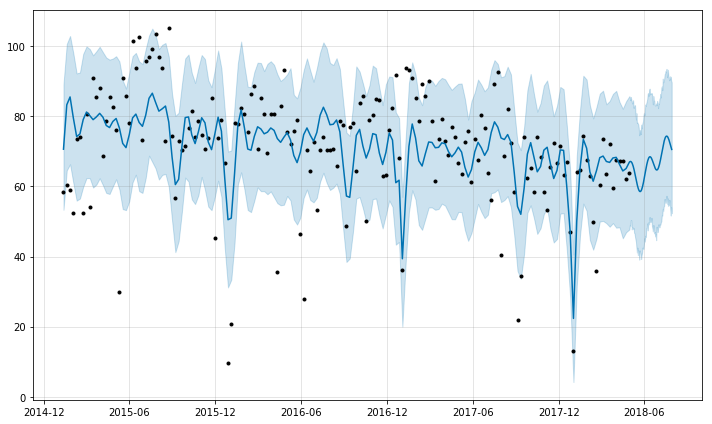

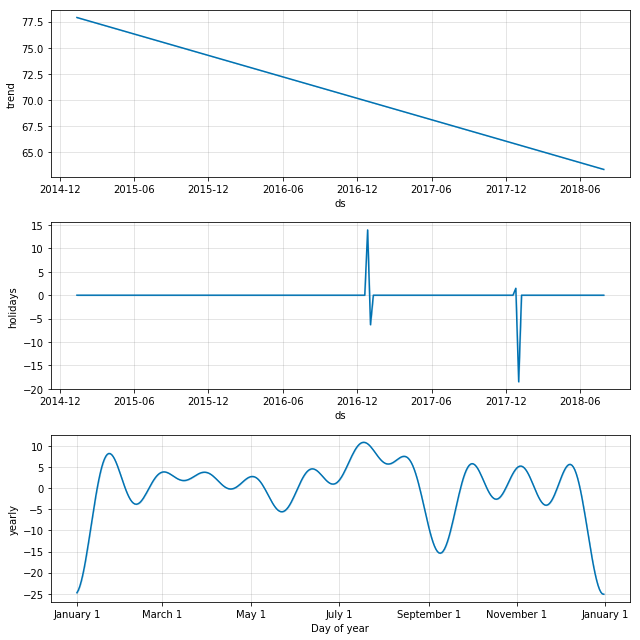

In [30]:
# Doctor's forecast + holidays
dr_model_h, dr_forecast_h, dr_pred_h, dr_h_df = get_prophet_forecast_holidays_date_index(df=dr_df, date_col=date_col,\
                     hours_col=hours_col, pred_cols=pred_cols, periods=periods, holidays=holidays1)
# plot forecast & decomposition w holidays
plot_prophet_forecast(dr_model_h, dr_forecast_h)

In [31]:
avg_dr_hours = dr_df['Hours_per_Provider'].mean()

In [32]:
# add predicted number of providers column
dr_h_df['Predicted_num_Providers'] = round(dr_h_df['yhat'] / avg_dr_hours, 1)

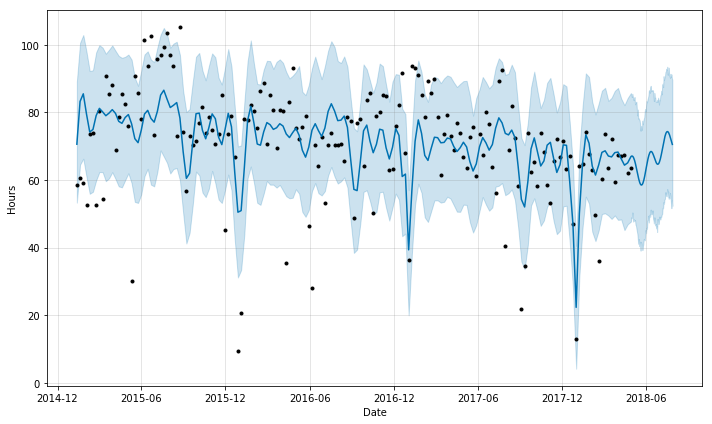

In [33]:
# fig = plot_prophet_forecast(dr_model_h, dr_forecast_h, xlabel='Date', ylabel='Hours')
dr_fig = dr_model_h.plot(dr_forecast_h, xlabel='Date', ylabel='Hours')
dr_fig.savefig('./images/dr_prophet_model_date_index.png')

In [34]:
dr_h_df.columns

Index(['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper',
       'Predicted_num_Providers'],
      dtype='object')

In [35]:
dr_h_df.index

DatetimeIndex(['2015-01-12', '2015-01-19', '2015-01-26', '2015-02-02',
               '2015-02-09', '2015-02-16', '2015-02-23', '2015-03-02',
               '2015-03-09', '2015-03-16',
               ...
               '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23',
               '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27',
               '2018-07-28', '2018-07-29'],
              dtype='datetime64[ns]', length=263, freq=None)

In [36]:
prophet_forecast_to_csv(dr_h_df, 'doctors_prophet_holidays_date_index')

#### RN/PAs

In [37]:
date_col = 'date'
hours_col = 'Hours'
periods = 90
pred_cols = ['yhat', 'yhat_lower', 'yhat_upper']

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


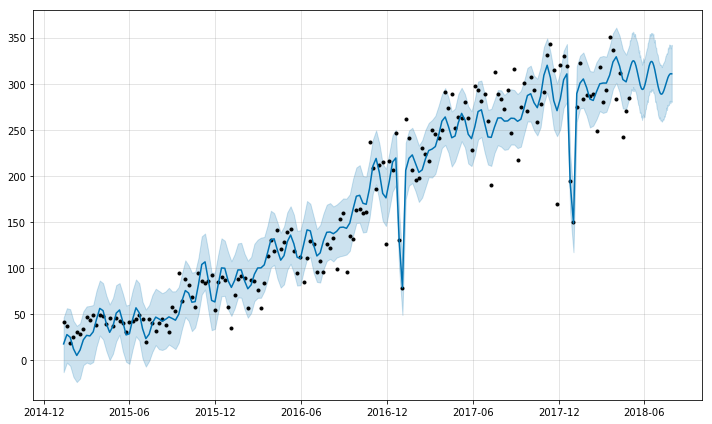

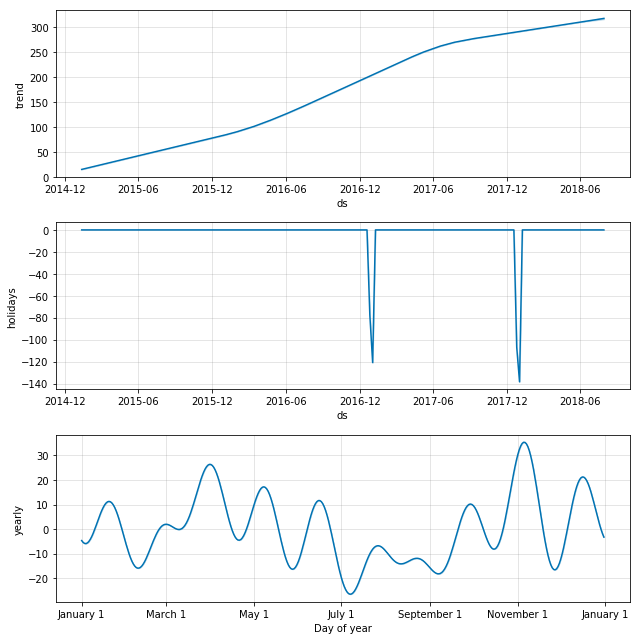

In [38]:
# RN/PA forecast + holidays
RNPA_model_h, RNPA_forecast_h, RNPA_pred_h, RNPA_h_df = get_prophet_forecast_holidays_date_index(df=RNPA_df, date_col=date_col,\
        hours_col=hours_col, pred_cols=pred_cols, periods=periods, holidays=holidays1_2)
# plot forecast & decomposition w holidays
plot_prophet_forecast(RNPA_model_h, RNPA_forecast_h)

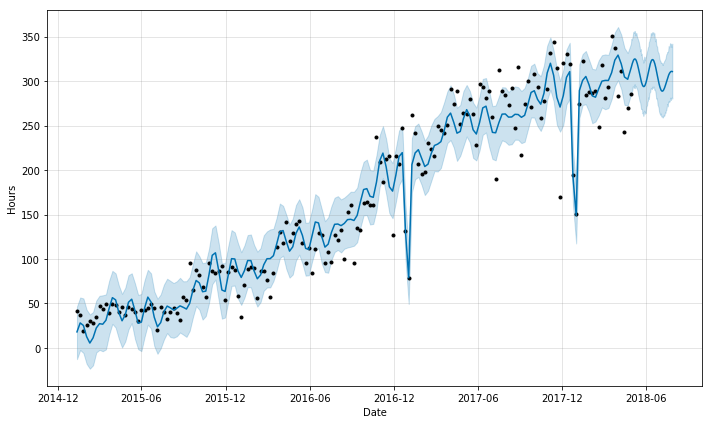

In [39]:
# fig = plot_prophet_forecast(dr_model_h, dr_forecast_h, xlabel='Date', ylabel='Hours')
RNPA_fig = RNPA_model_h.plot(RNPA_forecast_h, xlabel='Date', ylabel='Hours')
RNPA_fig.savefig('./images/RNPA_prophet_model_date_index.png')

In [40]:
avg_RNPA_hours = RNPA_df['Hours_per_Provider'].mean()

In [41]:
# add predicted number of providers column
RNPA_h_df['Predicted_num_Providers'] = round(RNPA_h_df['yhat'] / avg_RNPA_hours, 1)

In [42]:
prophet_forecast_to_csv(RNPA_h_df, 'RNPA_prophet_holidays_date_index')

#### therapists

In [43]:
date_col = 'date'
hours_col = 'Hours'
periods = 90
pred_cols = ['yhat', 'yhat_lower', 'yhat_upper']

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


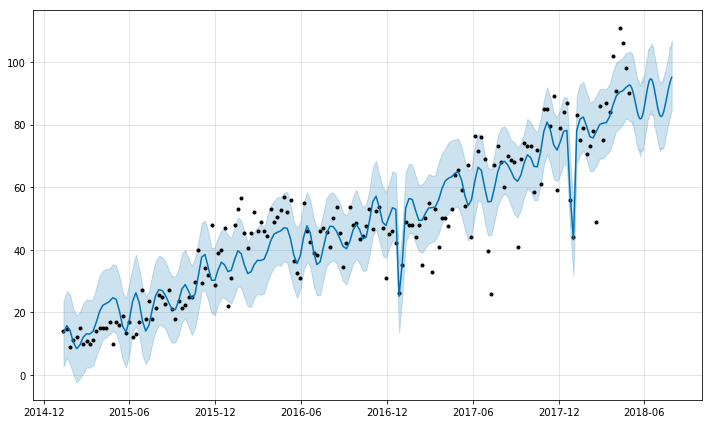

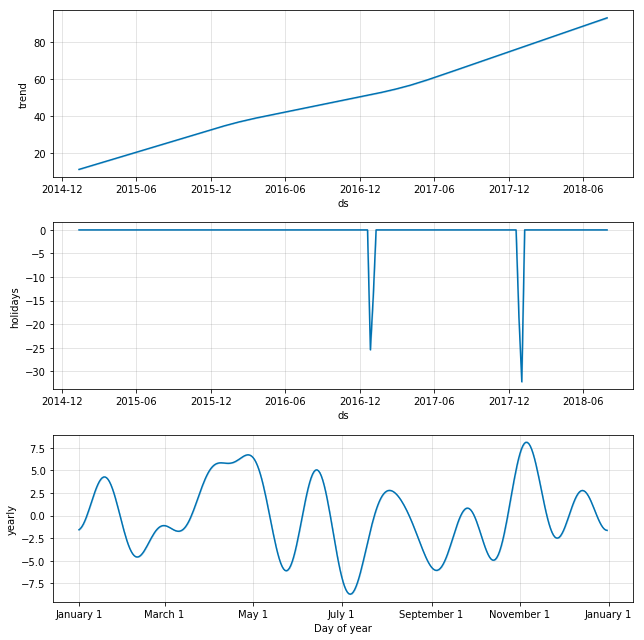

In [44]:
# Therapists forecast + holidays
ther_model_h, ther_forecast_h, ther_pred_h, ther_h_df = get_prophet_forecast_holidays_date_index(df=ther_df, date_col=date_col,\
        hours_col=hours_col, pred_cols=pred_cols, periods=periods, holidays=holidays1)
# plot forecast & decomposition w holidays
plot_prophet_forecast(ther_model_h, ther_forecast_h)

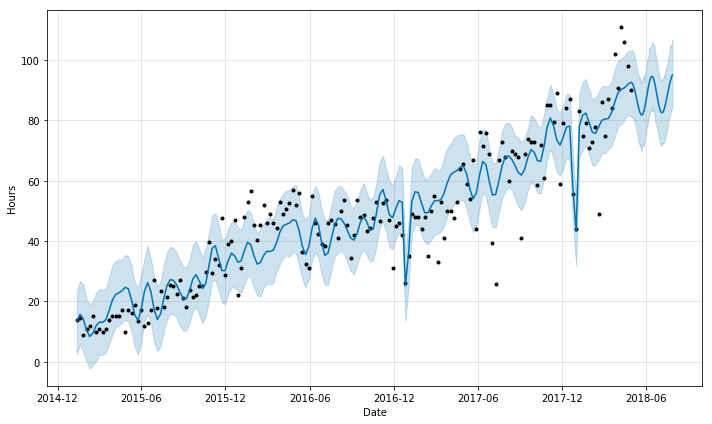

In [45]:
# fig = plot_prophet_forecast(dr_model_h, dr_forecast_h, xlabel='Date', ylabel='Hours')
ther_fig = ther_model_h.plot(ther_forecast_h, xlabel='Date', ylabel='Hours')
ther_fig.savefig('./images/ther_prophet_model_date_index.png')

In [46]:
avg_ther_hours = ther_df['Hours_per_Provider'].mean()

In [47]:
# add predicted number of providers column
ther_h_df['Predicted_num_Providers'] = round(ther_h_df['yhat'] / avg_ther_hours, 1)

In [48]:
prophet_forecast_to_csv(ther_h_df, 'therapist_prophet_holidays_date_index')

In [49]:
ther_h_df

,Date,True_Hours,Predicted_Hours,Lower_Limit,Upper_Limit,Predicted_num_Providers
2015-01-12,2015-01-12,14.00,13.395976,2.574735,23.378165,0.7
2015-01-19,2015-01-19,14.50,15.735143,5.621871,26.776993,0.9
2015-01-26,2015-01-26,9.00,14.174694,3.325697,25.659677,0.8
2015-02-02,2015-02-02,11.00,10.424187,0.194026,20.982254,0.6
2015-02-09,2015-02-09,12.00,8.353543,-2.318999,19.006202,0.5
2015-02-16,2015-02-16,15.00,9.546404,-1.128999,20.092879,0.5
2015-02-23,2015-02-23,10.00,11.988538,0.313467,22.835681,0.7
2015-03-02,2015-03-02,10.75,13.114595,2.288014,24.186929,0.7
2015-03-09,2015-03-09,9.75,13.033761,2.319348,23.801831,0.7
2015-03-16,2015-03-16,11.00,13.941260,2.959455,24.198669,0.8


#### get 12 week forecasts

In [50]:
forecasts = [dr_h_df, RNPA_h_df, ther_h_df]

In [51]:
dr_pred_h

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,Christams,Christams_lower,Christams_upper,New Years,...,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2018-05-01,2018-05-01,64.338384,64.338384,64.338384,48.969002,85.329213,0.0,0.0,0.0,0.0,...,2.693594,2.693594,2.693594,2.693594,2.693594,2.693594,2.693594,2.693594,2.693594,67.031978
2018-05-02,2018-05-02,64.327110,64.327110,64.327110,48.659416,84.555402,0.0,0.0,0.0,0.0,...,2.764143,2.764143,2.764143,2.764143,2.764143,2.764143,2.764143,2.764143,2.764143,67.091253
2018-05-03,2018-05-03,64.315835,64.315835,64.315835,50.385130,85.490980,0.0,0.0,0.0,0.0,...,2.759898,2.759898,2.759898,2.759898,2.759898,2.759898,2.759898,2.759898,2.759898,67.075733
2018-05-04,2018-05-04,64.304561,64.304561,64.304561,50.318014,84.877581,0.0,0.0,0.0,0.0,...,2.675369,2.675369,2.675369,2.675369,2.675369,2.675369,2.675369,2.675369,2.675369,66.979929
2018-05-05,2018-05-05,64.293286,64.293286,64.293286,47.697820,84.128870,0.0,0.0,0.0,0.0,...,2.507426,2.507426,2.507426,2.507426,2.507426,2.507426,2.507426,2.507426,2.507426,66.800713
2018-05-06,2018-05-06,64.282012,64.282012,64.282012,48.390689,83.618123,0.0,0.0,0.0,0.0,...,2.255458,2.255458,2.255458,2.255458,2.255458,2.255458,2.255458,2.255458,2.255458,66.537470
2018-05-07,2018-05-07,64.270737,64.270737,64.270737,48.215828,84.277190,0.0,0.0,0.0,0.0,...,1.921447,1.921447,1.921447,1.921447,1.921447,1.921447,1.921447,1.921447,1.921447,66.192184
2018-05-08,2018-05-08,64.259463,64.259463,64.259463,47.836094,84.541522,0.0,0.0,0.0,0.0,...,1.509975,1.509975,1.509975,1.509975,1.509975,1.509975,1.509975,1.509975,1.509975,65.769438
2018-05-09,2018-05-09,64.248188,64.248188,64.248188,48.115983,82.375422,0.0,0.0,0.0,0.0,...,1.028145,1.028145,1.028145,1.028145,1.028145,1.028145,1.028145,1.028145,1.028145,65.276334


In [52]:
dr_3mo_forecast = dr_h_df[174:186]
RNPA_3mo_forecast = RNPA_h_df[174:186]
ther_3mo_forecast = ther_h_df[174:186]

In [53]:
dr_3mo_forecast.columns

Index(['Date', 'True_Hours', 'Predicted_Hours', 'Lower_Limit', 'Upper_Limit',
       'Predicted_num_Providers'],
      dtype='object')

In [54]:
# round predicted hours column
dr_3mo_forecast['Predicted_Hours'] = round(dr_3mo_forecast['Predicted_Hours'])

In [55]:
dr_3mo_forecast

,Date,True_Hours,Predicted_Hours,Lower_Limit,Upper_Limit,Predicted_num_Providers
2018-05-02,NaN,NaN,67.0,48.659416,84.555402,2.5
2018-05-03,NaN,NaN,67.0,50.385130,85.490980,2.5
2018-05-04,NaN,NaN,67.0,50.318014,84.877581,2.5
2018-05-05,NaN,NaN,67.0,47.697820,84.128870,2.5
2018-05-06,NaN,NaN,67.0,48.390689,83.618123,2.4
2018-05-07,NaN,NaN,66.0,48.215828,84.277190,2.4
2018-05-08,NaN,NaN,66.0,47.836094,84.541522,2.4
2018-05-09,NaN,NaN,65.0,48.115983,82.375422,2.4
2018-05-10,NaN,NaN,65.0,46.745929,82.850037,2.4
2018-05-11,NaN,NaN,64.0,46.540395,83.136417,2.4


In [56]:
dr_3mo_forecast =  dr_3mo_forecast[['Predicted_Hours', 'Predicted_num_Providers']]
dr_3mo_forecast.rename_axis('Week')

,Predicted_Hours,Predicted_num_Providers
Week,,
2018-05-02,67.0,2.5
2018-05-03,67.0,2.5
2018-05-04,67.0,2.5
2018-05-05,67.0,2.5
2018-05-06,67.0,2.4
2018-05-07,66.0,2.4
2018-05-08,66.0,2.4
2018-05-09,65.0,2.4
2018-05-10,65.0,2.4


In [57]:
# save df to image
dr_3mo_forecast.to_csv('./data/dr_12_week_prophet_forecast_date_index.csv')

#### get doctors 8-16 week forecast

In [58]:
dr_8_to_16_wk_prophet = dr_h_df[184:193]

In [59]:
dr_8_to_16_wk_prophet

,Date,True_Hours,Predicted_Hours,Lower_Limit,Upper_Limit,Predicted_num_Providers
2018-05-12,NaN,NaN,63.479891,45.583527,83.120485,2.3
2018-05-13,NaN,NaN,62.819776,44.844651,80.798560,2.3
2018-05-14,NaN,NaN,62.154667,44.111848,79.064034,2.3
2018-05-15,NaN,NaN,61.501145,42.470884,80.854301,2.3
2018-05-16,NaN,NaN,60.875937,41.144561,78.126127,2.2
2018-05-17,NaN,NaN,60.295426,42.529425,78.249502,2.2
2018-05-18,NaN,NaN,59.775180,40.439262,77.888414,2.2
2018-05-19,NaN,NaN,59.329486,41.801811,77.647570,2.2
2018-05-20,NaN,NaN,58.970925,40.862657,76.551609,2.2


In [60]:
# reset index to forecast week number
dr_8_to_16_wk_prophet = dr_8_to_16_wk_prophet.reset_index()

In [61]:
dr_8_to_16_wk_prophet.index = dr_8_to_16_wk_prophet.index+8

In [62]:
# round up hours column
dr_8_to_16_wk_prophet['Predicted_Hours'] = round(dr_8_to_16_wk_prophet['Predicted_Hours'],1)

In [63]:
dr_8_to_16_wk_prophet =  dr_8_to_16_wk_prophet[['Predicted_Hours', 'Predicted_num_Providers']]
dr_8_to_16_wk_prophet.rename_axis('Week')

,Predicted_Hours,Predicted_num_Providers
Week,,
8,63.5,2.3
9,62.8,2.3
10,62.2,2.3
11,61.5,2.3
12,60.9,2.2
13,60.3,2.2
14,59.8,2.2
15,59.3,2.2
16,59.0,2.2


In [64]:
# save df to image
dr_8_to_16_wk_prophet.to_csv('./data/dr_8_to_16_wk_prophet_date_index.csv')

#### save doctors predictions as images for presentation

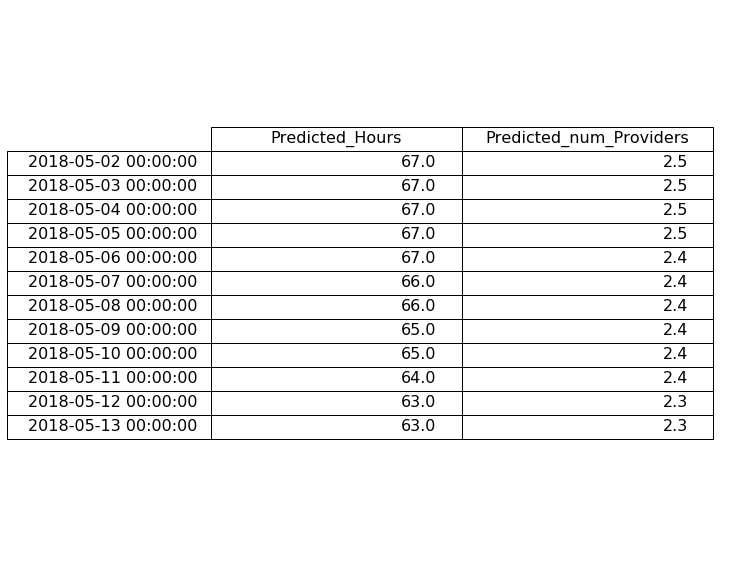

In [65]:
from pandas.tools.plotting import table
fig, ax = plt.subplots(figsize=(10,10)) # set size frame
ax.xaxis.set_visible(False)  # hide axes
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  
tabla = table(ax, dr_3mo_forecast, loc='center', colWidths=[0.3]*len(dr_3mo_forecast.columns))
tabla.auto_set_font_size(False) 
tabla.set_fontsize(16)
tabla.scale(1.5, 2) 
plt.savefig('./images/dr_12wk_Prophet_forecast_date_index.png', transparent=True)

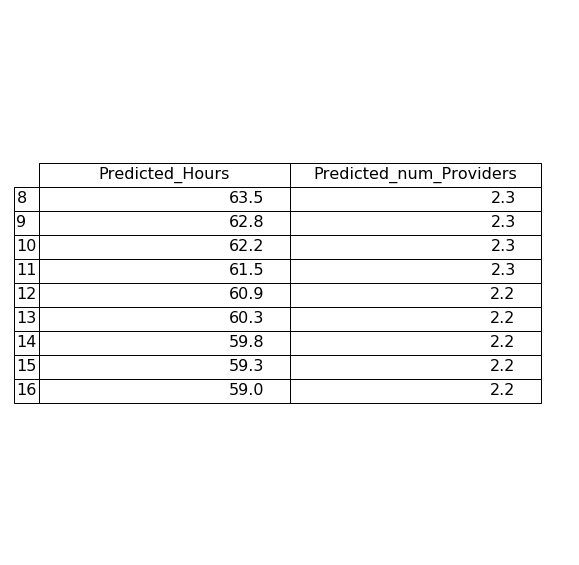

In [66]:
from pandas.tools.plotting import table
fig, ax = plt.subplots(figsize=(10,10)) # set size frame
ax.xaxis.set_visible(False)  # hide axes
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  
tabla = table(ax, dr_8_to_16_wk_prophet, loc='center', colWidths=[0.3]*len(dr_8_to_16_wk_prophet.columns))
tabla.auto_set_font_size(False) 
tabla.set_fontsize(16)
tabla.scale(1.5, 2) 
plt.savefig('./images/dr_8_to_16_wk_prophet_date_index.png', transparent=True)

#### Next Steps: 
##### add regressor for adding additional variable: number of providers

In [67]:
# Potential next steps: add exogenous variable - number of providers to each model
# help(Prophet.add_regressor)